# Demonstration
This is a demonstration of using `face-alignment` with S3FD as well as BlazeFace as backend. You will notice how BlazeFace speeds up the process significantly comparing to using the default face detector (S3FD)

In [12]:
import face_alignment
import cv2
import numpy as np
import torch
import matplotlib.pyplot as plt

In [13]:
# cap = cv2.VideoCapture('acazlolrpz.mp4')
# frames = []
# while True:
#     success, frame = cap.read()
#     if not success:
#         break
# import io
# tmp=io.imread("3.png")
# print(tmp)
img=cv2.imread("3.png")
frame = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Testing `face-alignment` with S3FD Face Detector

In [14]:
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_HALF_D, device='cpu', face_detector='sfd')
print(fa)

## Testing on single images

In [5]:
import time
t_start = time.time()
fa = face_alignment.FaceAlignment(face_alignment.LandmarksType.TWO_HALF_D, device='cpu', face_detector='sfd')
det = fa.get_landmarks_from_image(frame)
print(f'SFD: Execution time for a single image: {time.time() - t_start}')

SFD: Execution time for a single image: 30.0677969455719


1


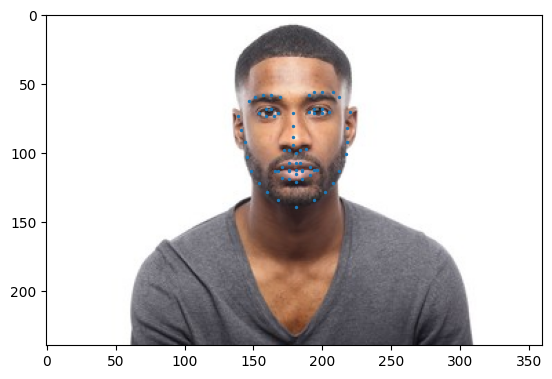

In [ ]:
plt.imshow(frame)
for detection in det:
    plt.scatter(detection[:,0], detection[:,1], 2)

In [118]:
def fgsm_attack(model, image, target_landmarks, epsilon):
    # 设置需要计算梯度
    image.requires_grad = True

    # 获取模型输出
    output = model.get_landmarks_from_image(image)
    
    output_torch=torch.from_numpy(output[0])

    output_torch.requires_grad=True

    # 确保模型在评估模式
    model.face_alignment_net.eval()

    # 计算损失
    loss = torch.nn.functional.mse_loss(output_torch, target_landmarks)
    # loss.requires_grad=True
    
    # 清零梯度
    model.face_alignment_net.zero_grad()
    # 反向传播
    loss.backward()
    
    # 获取图像的梯度
    data_grad = image.grad

    # 创建对抗样本
    perturbed_image = image + epsilon * data_grad.sign()
    
    # 限制范围
    perturbed_image = torch.clamp(perturbed_image, 0, 255)  # 确保像素值在有效范围内

    return perturbed_image


In [143]:
image = torch.from_numpy(frame).float().requires_grad_(True)

# 获取目标地标（你需要手动设置或者从某处获取）
target_landmarks = torch.zeros((68, 2), dtype=torch.float32)  # 假设目标地标为全零

# 设置 epsilon（扰动程度）
epsilon = 0.01 

# 执行 FGSM 攻击
# perturbed_image = fgsm_attack(fa, image, target_landmarks, epsilon)

# 使用被攻击的图像进行地标检测
# detected_landmarks = fa.get_landmarks_from_image(perturbed_image)

In [ ]:
def test(model, image, target_landmarks, epsilon):
    # 设置需要计算梯度
    image.requires_grad = True

    # 获取模型输出
    output = model.get_landmarks_from_image(image)
    
    output_torch=torch.from_numpy(output[0])

    # 确保模型在评估模式
    model.face_alignment_net.eval()

    # 计算损失
    loss = torch.nn.functional.mse_loss(output_torch, target_landmarks)
    # loss.requires_grad=True
    
    # 清零梯度
    model.face_alignment_net.zero_grad()
    # loss.retain_grad()
    # 反向传播
    loss.backward()
    
    # 获取图像的梯度
    data_grad = image.grad

    return image.grad

tmp=test(fa, image, target_landmarks, epsilon)
print(tmp)